In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
pd.options.display.max_columns=40

In [122]:
df = pd.read_csv('./archive/defense.csv')
df.head()

,id,season,country,comp_level,lg_finish,squad,age,minutes_90s,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,tackles_interceptions,clearances,errors
0,0000acda,2012-2013,ITA,1. Serie A,9th,Inter,17.0,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000acda,2013-2014,ITA,1. Serie A,20th,Livorno,18.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000acda,2014-2015,ITA,1. Serie A,9th,Torino,19.0,15.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000acda,2015-2016,ITA,1. Serie A,12th,Torino,20.0,21.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000acda,2016-2017,ITA,1. Serie A,9th,Torino,21.0,22.7,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN


In [123]:
season = [f"{year}-{year+1}" for year in range(2015, 2021)]
league = ['1. Serie A', '1. Ligue 1', '1. Bundesliga',  '1. La Liga', '1. Premier League']
season
df = df[df["season"].isin(season) & df["comp_level"].isin(league)]
df.head(3)

,id,season,country,comp_level,lg_finish,squad,age,minutes_90s,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,tackles_interceptions,clearances,errors
3,0000acda,2015-2016,ITA,1. Serie A,12th,Torino,20.0,21.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000acda,2016-2017,ITA,1. Serie A,9th,Torino,21.0,22.7,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN
5,0000acda,2017-2018,ITA,1. Serie A,8th,Fiorentina,22.0,30.9,58.0,39.0,17.0,24.0,17.0,24.0,78.0,30.8,54.0,527.0,181.0,34.3,100.0,243.0,184.0,61.0,6.0,0.0,55.0,32.0,90.0,30.0,0.0


# 유럽 5대 리그 시즌별 선수 평균 연령 

<Figure size 864x576 with 0 Axes>

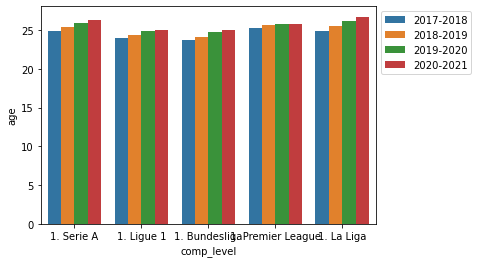

<Figure size 864x576 with 0 Axes>

In [142]:
sns.barplot(data=df, x='comp_level', y='age', hue='season', ci=None)
plt.legend(bbox_to_anchor=(1, 1))
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

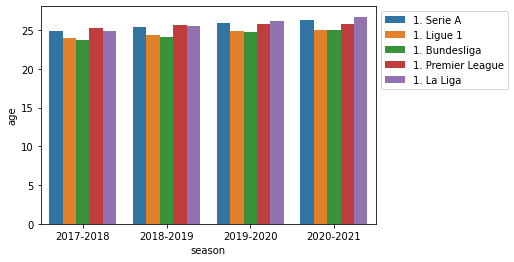

<Figure size 864x576 with 0 Axes>

In [141]:
sns.barplot(data=df, x='season', y='age', hue='comp_level', ci=None)
plt.legend(bbox_to_anchor=(1, 1))
plt.figure(figsize=(12, 8))

# 지표별 구분

In [34]:
headers = ['id', 'season','comp_level', 'squad', 'age', 'minutes_90s']
tkls = ['tackles', 'tackles_won', 'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd']
vs_dribbles = ['dribble_tackles', 'dribbles_vs', 'dribble_tackles_pct', 'dribbled_past']
pressures = ['pressures', 'pressure_regains', 'pressure_regain_pct', 'pressures_def_3rd', 'pressures_mid_3rd', 'pressures_att_3rd']
blocks = ['blocks', 'blocked_shots', 'blocked_shots_saves', 'blocked_passes', 'interceptions', 'tackles_interceptions']
others = ['clearances', 'errors']

# 선수 몇 명의 데이터인가?

In [126]:
df["id"].unique().size

2203

# 총 데이터의 수는?

In [127]:
df.shape

(8294, 31)

# 결측치 확인

In [128]:
df.isnull().sum()

id                          0
season                      0
country                     0
comp_level                  0
lg_finish                   0
squad                       0
age                         0
minutes_90s                 0
tackles                  2033
tackles_won               891
tackles_def_3rd          2033
tackles_mid_3rd          2033
tackles_att_3rd          2033
dribble_tackles          2033
dribbles_vs              2033
dribble_tackles_pct      2528
dribbled_past            2033
pressures                2033
pressure_regains         2033
pressure_regain_pct      2247
pressures_def_3rd        2033
pressures_mid_3rd        2033
pressures_att_3rd        2033
blocks                   2033
blocked_shots            2033
blocked_shots_saves      2033
blocked_passes           2033
interceptions             891
tackles_interceptions    2033
clearances               2033
errors                   2033
dtype: int64

# 의미있는 데이터만 남기기

## 1. 수비지표에  결측치가 있는 경우 행 삭제

In [129]:
df = df[~df.isnull().any(axis=1)]
df

,id,season,country,comp_level,lg_finish,squad,age,minutes_90s,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,tackles_interceptions,clearances,errors
5,0000acda,2017-2018,ITA,1. Serie A,8th,Fiorentina,22.0,30.9,58.0,39.0,17.0,24.0,17.0,24.0,78.0,30.8,54.0,527.0,181.0,34.3,100.0,243.0,184.0,61.0,6.0,0.0,55.0,32.0,90.0,30.0,0.0
6,0000acda,2018-2019,ITA,1. Serie A,16th,Fiorentina,23.0,25.4,25.0,16.0,6.0,15.0,4.0,10.0,46.0,21.7,36.0,344.0,89.0,25.9,75.0,151.0,118.0,26.0,5.0,2.0,21.0,15.0,40.0,27.0,0.0
7,0000acda,2019-2020,ITA,1. Serie A,10th,Fiorentina,24.0,10.9,17.0,10.0,10.0,3.0,4.0,10.0,31.0,32.3,21.0,226.0,50.0,22.1,49.0,101.0,76.0,19.0,2.0,0.0,17.0,4.0,21.0,13.0,0.0
12,00242715,2017-2018,FRA,1. Ligue 1,20th,Metz,21.0,34.5,61.0,33.0,45.0,14.0,2.0,14.0,31.0,45.2,17.0,259.0,107.0,41.3,180.0,69.0,10.0,42.0,16.0,1.0,26.0,43.0,104.0,117.0,3.0
13,00242715,2018-2019,GER,1. Bundesliga,12th,Mainz 05,22.0,31.0,51.0,29.0,35.0,13.0,3.0,16.0,37.0,43.2,21.0,283.0,98.0,34.6,174.0,93.0,16.0,58.0,23.0,1.0,35.0,25.0,76.0,144.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21353,ffec9769,2017-2018,ENG,1. Premier League,9th,Leicester City,29.0,2.8,2.0,2.0,1.0,1.0,0.0,0.0,6.0,0.0,6.0,75.0,21.0,28.0,11.0,36.0,28.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0
21354,ffec9769,2017-2018,ENG,1. Premier League,10th,Newcastle Utd,29.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,20.0,5.0,25.0,0.0,11.0,9.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
21356,ffec9769,2019-2020,FRA,1. Ligue 1,9th,Monaco,31.0,14.3,10.0,7.0,0.0,4.0,6.0,3.0,13.0,23.1,10.0,208.0,54.0,26.0,7.0,84.0,117.0,7.0,1.0,0.0,6.0,2.0,12.0,8.0,0.0
21358,ffec9769,2020-2021,FRA,1. Ligue 1,4th,Lyon,32.0,6.4,10.0,5.0,4.0,3.0,3.0,3.0,14.0,21.4,11.0,123.0,22.0,17.9,10.0,48.0,65.0,2.0,1.0,0.0,1.0,1.0,11.0,4.0,0.0


## 최소 10경기 이상 뛴 선수만 선정

In [130]:
df = df[df['minutes_90s'] >= 10]
df

,id,season,country,comp_level,lg_finish,squad,age,minutes_90s,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,tackles_interceptions,clearances,errors
5,0000acda,2017-2018,ITA,1. Serie A,8th,Fiorentina,22.0,30.9,58.0,39.0,17.0,24.0,17.0,24.0,78.0,30.8,54.0,527.0,181.0,34.3,100.0,243.0,184.0,61.0,6.0,0.0,55.0,32.0,90.0,30.0,0.0
6,0000acda,2018-2019,ITA,1. Serie A,16th,Fiorentina,23.0,25.4,25.0,16.0,6.0,15.0,4.0,10.0,46.0,21.7,36.0,344.0,89.0,25.9,75.0,151.0,118.0,26.0,5.0,2.0,21.0,15.0,40.0,27.0,0.0
7,0000acda,2019-2020,ITA,1. Serie A,10th,Fiorentina,24.0,10.9,17.0,10.0,10.0,3.0,4.0,10.0,31.0,32.3,21.0,226.0,50.0,22.1,49.0,101.0,76.0,19.0,2.0,0.0,17.0,4.0,21.0,13.0,0.0
12,00242715,2017-2018,FRA,1. Ligue 1,20th,Metz,21.0,34.5,61.0,33.0,45.0,14.0,2.0,14.0,31.0,45.2,17.0,259.0,107.0,41.3,180.0,69.0,10.0,42.0,16.0,1.0,26.0,43.0,104.0,117.0,3.0
13,00242715,2018-2019,GER,1. Bundesliga,12th,Mainz 05,22.0,31.0,51.0,29.0,35.0,13.0,3.0,16.0,37.0,43.2,21.0,283.0,98.0,34.6,174.0,93.0,16.0,58.0,23.0,1.0,35.0,25.0,76.0,144.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21344,ffbbc83b,2018-2019,GER,1. Bundesliga,9th,Hoffenheim,22.0,26.6,72.0,45.0,27.0,37.0,8.0,19.0,60.0,31.7,41.0,528.0,151.0,28.6,189.0,288.0,51.0,51.0,8.0,0.0,43.0,53.0,125.0,70.0,0.0
21345,ffbbc83b,2019-2020,GER,1. Bundesliga,6th,Hoffenheim,23.0,26.8,68.0,45.0,38.0,29.0,1.0,26.0,61.0,42.6,35.0,407.0,131.0,32.2,175.0,199.0,33.0,53.0,7.0,0.0,46.0,36.0,104.0,46.0,0.0
21346,ffbbc83b,2020-2021,GER,1. Bundesliga,11th,Hoffenheim,24.0,20.9,38.0,25.0,22.0,15.0,1.0,9.0,48.0,18.8,39.0,337.0,102.0,30.3,112.0,168.0,57.0,50.0,8.0,0.0,42.0,47.0,85.0,54.0,0.0
21356,ffec9769,2019-2020,FRA,1. Ligue 1,9th,Monaco,31.0,14.3,10.0,7.0,0.0,4.0,6.0,3.0,13.0,23.1,10.0,208.0,54.0,26.0,7.0,84.0,117.0,7.0,1.0,0.0,6.0,2.0,12.0,8.0,0.0


In [132]:
df.isnull().sum()

id                       0
season                   0
country                  0
comp_level               0
lg_finish                0
squad                    0
age                      0
minutes_90s              0
tackles                  0
tackles_won              0
tackles_def_3rd          0
tackles_mid_3rd          0
tackles_att_3rd          0
dribble_tackles          0
dribbles_vs              0
dribble_tackles_pct      0
dribbled_past            0
pressures                0
pressure_regains         0
pressure_regain_pct      0
pressures_def_3rd        0
pressures_mid_3rd        0
pressures_att_3rd        0
blocks                   0
blocked_shots            0
blocked_shots_saves      0
blocked_passes           0
interceptions            0
tackles_interceptions    0
clearances               0
errors                   0
dtype: int64

# 태클 성공률 파생변수 생성

In [134]:
df['tackles_success_pct'] = df['tackles_won'] / df['tackles']
df.describe()

C:\Users\pge08\AppData\Local\Temp\ipykernel_13100\3054671522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tackles_success_pct'] = df['tackles_won'] / df['tackles']


,age,minutes_90s,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,tackles_interceptions,clearances,errors,tackles_success_pct
count,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4282.000000,4077.000000
mean,25.344699,22.829169,36.288884,22.788183,17.802429,14.034096,4.452359,12.091780,34.951191,32.484376,22.859411,324.963802,92.682391,28.863428,105.453059,146.521018,72.989724,32.656936,6.974311,0.142690,25.682625,20.061186,56.350070,47.948389,0.500934,0.631021
std,3.772843,7.515089,23.204974,15.068286,13.647281,10.267242,3.693488,8.988286,22.360611,15.947657,15.385852,176.290295,48.524244,7.967780,68.087823,95.136468,65.784063,18.525316,7.757767,0.426251,15.045285,14.855057,35.320405,51.963169,0.850752,0.114224
min,16.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.500000,19.000000,12.000000,7.000000,7.000000,2.000000,5.000000,19.000000,22.600000,12.000000,206.000000,60.000000,25.500000,54.000000,80.000000,20.000000,19.000000,2.000000,0.000000,15.000000,9.000000,30.000000,11.000000,0.000000,0.562500
50%,25.000000,22.700000,33.000000,20.000000,16.000000,12.000000,4.000000,10.000000,31.000000,32.500000,20.000000,301.000000,87.000000,28.800000,99.000000,128.000000,58.000000,31.000000,4.000000,0.000000,24.000000,17.000000,52.000000,29.000000,0.000000,0.631579
75%,28.000000,29.000000,50.000000,31.000000,26.000000,19.000000,7.000000,17.000000,48.000000,43.200000,30.000000,426.000000,122.000000,32.400000,148.000000,197.000000,107.000000,45.000000,9.000000,0.000000,35.000000,28.000000,78.000000,67.000000,1.000000,0.702128
max,39.000000,38.000000,168.000000,114.000000,101.000000,79.000000,29.000000,61.000000,179.000000,100.000000,126.000000,1056.000000,313.000000,100.000000,463.000000,604.000000,579.000000,128.000000,62.000000,4.000000,96.000000,95.000000,241.000000,368.000000,7.000000,1.000000


In [136]:
df.corr()

,age,minutes_90s,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,tackles_interceptions,clearances,errors,tackles_success_pct
age,1.000000,0.133216,-0.076419,-0.074890,-0.064954,-0.062324,-0.066862,-0.028169,-0.035331,-0.067892,-0.034891,-0.108239,-0.097165,0.019114,-0.099499,-0.100744,-0.041384,-0.052831,0.048675,0.020973,-0.090149,-0.017223,-0.057449,0.060005,0.044584,-0.011382
minutes_90s,0.133216,1.000000,0.381328,0.377121,0.349513,0.320657,0.212958,0.338435,0.372710,-0.041901,0.343957,0.403112,0.432967,-0.016912,0.408256,0.321735,0.192429,0.469575,0.328718,0.128252,0.408693,0.393933,0.416208,0.327886,0.229489,0.015754
tackles,-0.076419,0.381328,1.000000,0.967791,0.891913,0.891393,0.509176,0.892336,0.861910,0.438859,0.731339,0.637971,0.746276,0.204236,0.863561,0.561422,0.003928,0.767941,0.351488,0.116958,0.764332,0.708401,0.954924,0.373846,0.078133,-0.045784
tackles_won,-0.074890,0.377121,0.967791,1.000000,0.824683,0.904748,0.518101,0.842290,0.851230,0.377104,0.745053,0.668946,0.778227,0.200638,0.824176,0.615688,0.049219,0.716818,0.314022,0.101738,0.720702,0.670785,0.917943,0.310673,0.055692,0.164734
tackles_def_3rd,-0.064954,0.349513,0.891913,0.824683,1.000000,0.617927,0.190912,0.855232,0.699688,0.563665,0.517253,0.371882,0.501131,0.267084,0.866081,0.246139,-0.255795,0.767456,0.523141,0.205303,0.675226,0.723994,0.890471,0.590042,0.205109,-0.146419
tackles_mid_3rd,-0.062324,0.320657,0.891393,0.904748,0.617927,1.000000,0.537292,0.744001,0.824389,0.246802,0.763464,0.706634,0.783678,0.122916,0.695495,0.712369,0.143586,0.609387,0.167438,0.030005,0.664005,0.574037,0.827060,0.142380,-0.021585,0.069508
tackles_att_3rd,-0.066862,0.212958,0.509176,0.518101,0.190912,0.537292,1.000000,0.378017,0.538128,-0.011578,0.561239,0.669758,0.658462,-0.045401,0.291986,0.637494,0.570687,0.295015,-0.190147,-0.107183,0.461298,0.179800,0.410142,-0.227218,-0.206982,0.066524
dribble_tackles,-0.028169,0.338435,0.892336,0.842290,0.855232,0.744001,0.378017,1.000000,0.855945,0.568652,0.659773,0.478493,0.589514,0.214873,0.803390,0.387824,-0.110112,0.728349,0.353717,0.133945,0.714432,0.643452,0.856875,0.411752,0.105912,-0.107716
dribbles_vs,-0.035331,0.372710,0.861910,0.851230,0.699688,0.824389,0.538128,0.855945,1.000000,0.207067,0.953287,0.734420,0.779164,0.082186,0.792316,0.685072,0.157314,0.682092,0.177029,0.056143,0.748581,0.583728,0.811766,0.178280,-0.009410,0.006083
dribble_tackles_pct,-0.067892,-0.041901,0.438859,0.377104,0.563665,0.246802,-0.011578,0.568652,0.207067,1.000000,-0.031266,-0.032345,0.094852,0.366872,0.420688,-0.118729,-0.350393,0.456069,0.466272,0.192404,0.321136,0.424109,0.466695,0.543954,0.160723,-0.212928


In [138]:
df[(df["tackles"] >= 50) & (df['tackles_success_pct']>0.3)].corr()

,age,minutes_90s,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,tackles_interceptions,clearances,errors,tackles_success_pct
age,1.000000,0.011222,-0.039897,-0.031925,-0.026915,-0.018288,-0.035298,0.109799,0.098661,0.022458,0.070953,-0.086433,-0.069538,0.061505,-0.060275,-0.066993,-0.072717,-0.058070,0.013220,-0.040261,-0.074304,0.019649,-0.013480,0.064241,-0.009687,0.002310
minutes_90s,0.011222,1.000000,0.345961,0.317363,0.322907,0.157548,0.062281,0.237164,0.282194,-0.030020,0.239239,0.363035,0.390314,-0.023118,0.482865,0.231705,0.160281,0.567092,0.356234,0.121967,0.428926,0.407756,0.453996,0.354688,0.166306,0.048031
tackles,-0.039897,0.345961,1.000000,0.882437,0.653244,0.716229,0.333386,0.637152,0.620272,0.013193,0.471166,0.470496,0.578345,0.030230,0.581957,0.384557,0.085417,0.399882,0.053984,-0.025163,0.423017,0.369512,0.840496,0.038168,-0.021245,0.070110
tackles_won,-0.031925,0.317363,0.882437,1.000000,0.431736,0.779302,0.343781,0.489120,0.610483,-0.146343,0.528860,0.555045,0.674744,0.040694,0.477352,0.530057,0.170453,0.260310,0.008135,-0.038249,0.291880,0.296259,0.724302,-0.090031,-0.061095,0.518919
tackles_def_3rd,-0.026915,0.322907,0.653244,0.431736,1.000000,-0.006543,-0.236632,0.563470,0.220509,0.415760,0.008444,-0.068579,0.030578,0.228419,0.624134,-0.241610,-0.395780,0.474800,0.392284,0.136228,0.301639,0.400969,0.642102,0.503629,0.195808,-0.235482
tackles_mid_3rd,-0.018288,0.157548,0.716229,0.779302,-0.006543,1.000000,0.391428,0.321911,0.587540,-0.321292,0.579237,0.619905,0.688357,-0.107573,0.230876,0.692169,0.311555,0.103008,-0.186904,-0.126589,0.231728,0.182234,0.553930,-0.311880,-0.155940,0.334205
tackles_att_3rd,-0.035298,0.062281,0.333386,0.343781,-0.236632,0.391428,1.000000,0.125448,0.375778,-0.332979,0.408437,0.521524,0.499320,-0.258176,-0.037153,0.497782,0.678271,-0.020244,-0.430374,-0.171461,0.240013,-0.120791,0.137948,-0.501444,-0.250917,0.125148
dribble_tackles,0.109799,0.237164,0.637152,0.489120,0.563470,0.321911,0.125448,1.000000,0.656727,0.397959,0.345258,0.114861,0.201393,0.107586,0.412127,0.021703,-0.122165,0.347267,0.089095,0.021681,0.341550,0.200956,0.515419,0.167302,0.050656,-0.113365
dribbles_vs,0.098661,0.282194,0.620272,0.610483,0.220509,0.587540,0.375778,0.656727,1.000000,-0.391371,0.934495,0.627830,0.623532,-0.240191,0.475145,0.575675,0.309788,0.262030,-0.167071,-0.082496,0.400950,0.129395,0.463143,-0.224344,-0.104948,0.160568
dribble_tackles_pct,0.022458,-0.030020,0.013193,-0.146343,0.415760,-0.321292,-0.332979,0.397959,-0.391371,1.000000,-0.674909,-0.610322,-0.503350,0.437502,-0.051681,-0.655207,-0.546579,0.116012,0.352130,0.137899,-0.082969,0.095430,0.063890,0.505226,0.207176,-0.328647


<AxesSubplot:xlabel='comp_level', ylabel='tackles_success_pct'>

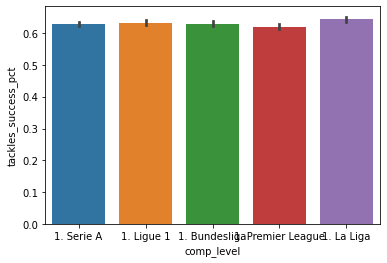

In [135]:
sns.barplot(data=df, x='comp_level', y='tackles_success_pct')

In [ ]:
sns.scatterplot(data=df, )

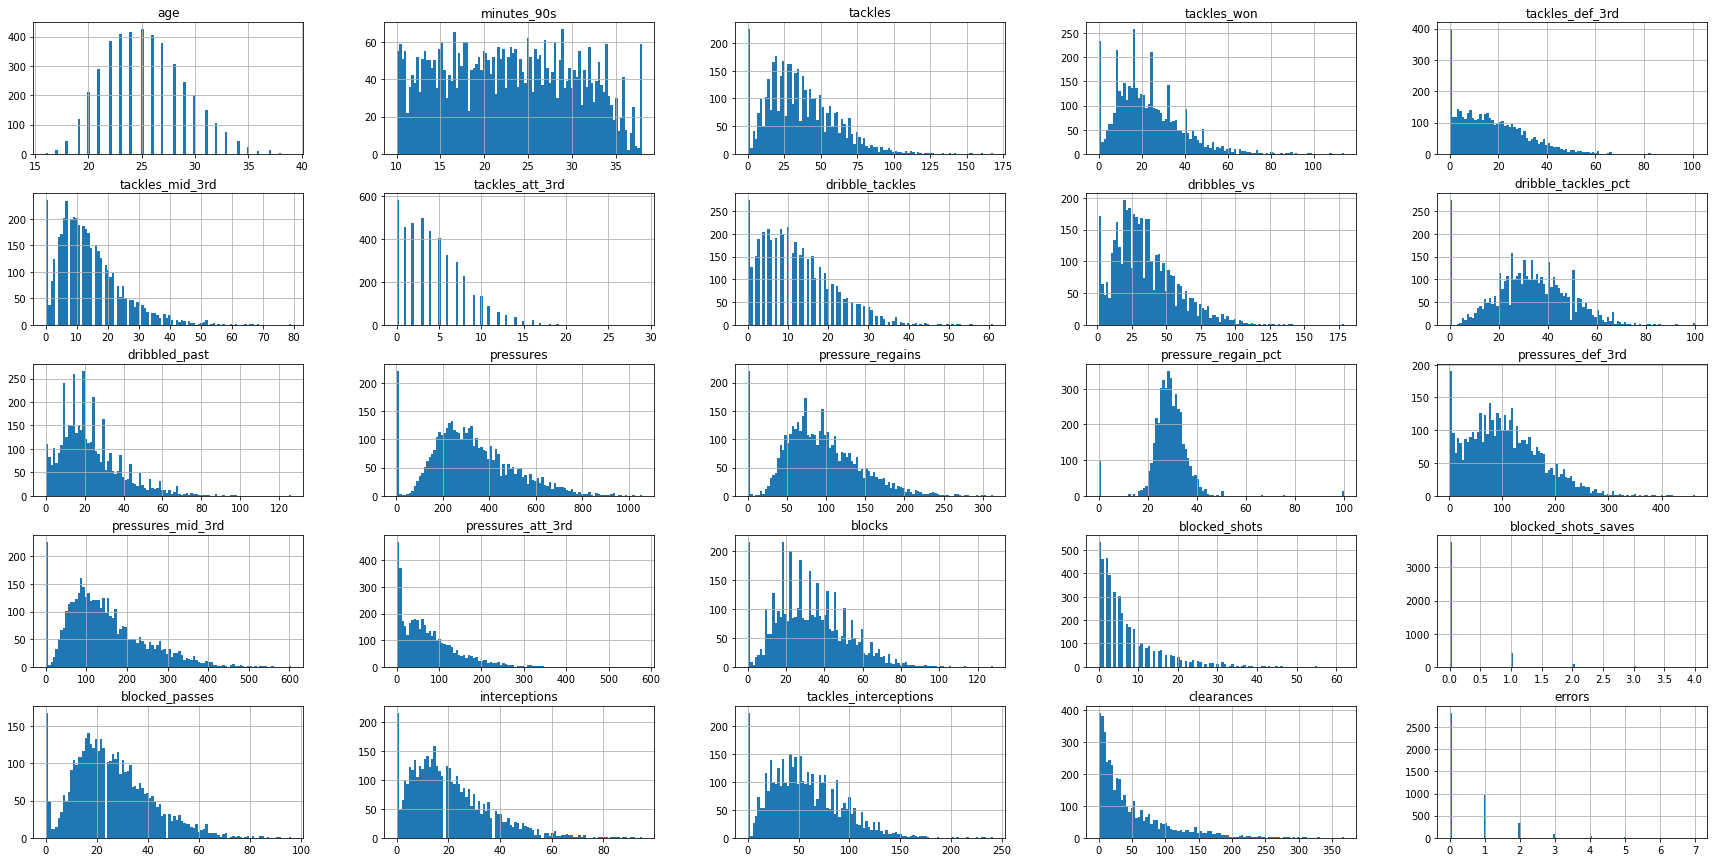

In [131]:
_ = df.hist(bins=100, figsize=(30, 15))